In [ ]:
import nltk
import numpy as np
import pandas as pd
import re

In [ ]:
!pip install pdfplumber

     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 5.6MB 32.4MB/s 
     |████████████████████████████████| 143kB 47.8MB/s 
     |████████████████████████████████| 1.9MB 39.9MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.28-cp37-none-any.whl size=32241 sha256=b9c029c825aa7126ea6c5a764ac5575891f3db6a9b8c9f6c4b40d50187301f8d
  Stored in directory: /root/.cache/pip/wheels/5a/9b/3d/37e37d93650be964fdd2a9babf174214fec8a0f4d222d474ab
Successfully built pdfplumber


In [ ]:
!pip install pdfminer

     |████████████████████████████████| 4.2MB 28.4MB/s 
  Created wheel for pdfminer: filename=pdfminer-20191125-cp37-none-any.whl size=6140101 sha256=003a76bb2edea320585b5c2c867caca22ed349763fd817f1d33a568715d0919d
  Stored in directory: /root/.cache/pip/wheels/e1/00/af/720a55d74ba3615bb4709a3ded6dd71dc5370a586a0ff6f326
Successfully built pdfminer


In [ ]:
!pip install pdfreader

     |████████████████████████████████| 2.9MB 29.2MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
  Created wheel for pdfreader: filename=pdfreader-0.1.10-cp37-none-any.whl size=134143 sha256=56bbab8449201a4a22ebe76403d9841dd35cdc9e98dcc08eadfaed9609e3f735
  Stored in directory: /root/.cache/pip/wheels/23/80/4f/041626d15cc987ee20476cac8ad69905fea2774380b59623b0
  Created wheel for bitarray: filename=bitarray-2.1.3-cp37-cp37m-linux_x86_64.whl size=149704 sha256=f2c90d90360fe21a1fd6303d409631dc45eccbcbd1baff3d63b7a2d16a2b90da
  Stored in directory: /root/.cache/pip/wheels/26/ba/11/f48bf4bf3271b78fcc765600611aac9790c3d71ec9c52af5c5
Successfully built pdfreader bitarray


In [ ]:
from pdfreader import PDFDocument
fd = open('AR-16.pdf', "rb")
doc = PDFDocument(fd)

In [ ]:
from itertools import islice
page = next(islice(doc.pages(), 2, 3))

In [ ]:
import pdfplumber
pdf = pdfplumber.open('AR-16-2.pdf')
text=''
for i in range(0,len(pdf.pages)):
  page = pdf.pages[i]
  if page.extract_text() is None:
    continue
  
  text += page.extract_text()

  #t.append(text)
pdf.close()
#print(t[1])
print(text)

 
 
27 December 2016 
 
BSE Limited,  Nation aI Stock Exchange of India Ltd, 
2  Floor, New Trading Wing,  Exchange Plaza, 5th Floor, 
Rotunda Building, P. J. Towers,  Plot No. C/1, G Block, 
Dalal Street, Mumbai -400 001  Bandra - hurla Con4pIex, 
  Bandra (E), Mumbai - 400 051 
Symbol: JETAIRWAYS/Series: EQ 
Debenture Scrip CODE: 952813  Stock Code: 532617/JETAIRWAYS 
 
Dear Sirs, 
 
Sub:    Intimation under Regulation 30 - Annual Report 2015-16 
 
Further to our letter dated  23  November 2016  informing  you  of  the  date  of  our 
24'^ Annual General Meeting, 2016 as required hy Regulation .3 4 of the Securities and 
Exchange  Board  of  India  (Listing  Obligations  and  Disclosure  Requirements) 
Regulations, 20 lS,  we  attach a copy  of  Annual  Report  for the  financial  year  2015  — 
duly  approved  and  adopted  by  the  Members  at  the  An  nual  General  Meeting  of  the 
Company held earlier in the day. 
Please take the above on record. 
 
Yours faithfully, 
Jet Airw

In [ ]:
f=processing(pdf)

['letter', 'chairman', 'dear', 'shareholders', ',', 'letter', 'last', 'year', ',', 'stated', 'jet', 'airways', 'optimistic', 'would', 'significant', 'improvement', 'performance', 'company', '2010-11', 'management', 'implementing', 'several', 'marketing', 'operational', 'measures', 'achieve', '.', 'glad', 'inform', 'efforts', 'reasonably', 'successful', '.', 'company', '’', 'performance', 'year', 'review', ',', 'terms', 'operational', 'financial', 'parameters', ',', 'shown', 'marked', 'improvement', 'previous', 'year', '.', 'despite', 'sharp', 'increase', 'price', 'aviation', 'turbine', 'fuel', '(', 'atf', ')', 'particularly', 'fourth', 'quarter', 'financial', 'year', ',', 'company', 'successful', 'reporting', 'record', 'profit', 'tax', 'rs.466', 'million', 'pre-tax', 'loss', 'rs.4,676', 'million', 'previous', 'year', '.', 'company', 'achieved', 'seat', 'factor', '78.6', '%', 'system-wide', 'operations', 'carried', '14.7', 'million', 'passengers', 'services', ',', '22', '%', 'higher', '

In [ ]:
def remove_html_tags(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    return text
def clean_text(text):
    text = text.lower()
    text = remove_html_tags(text)
    
    return text

In [ ]:
text=clean_text(text)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#tokenization
words=[]
sentences = nltk.sent_tokenize(text)
for sentence in sentences:
    #print(sentence)
    words = words+ nltk.word_tokenize(sentence)
    #for word in words:

print(len(words))

  

40266


In [ ]:
#lemmetization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
def lemmatize_words(words):

    lemmatized_words = [WordNetLemmatizer().lemmatize(word, 'v') for word in words]
    
    return lemmatized_words

In [ ]:
nltk.download('wordnet')
p=lemmatize_words(words)
print(len(p))


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removing stop words
stop_words = set(stopwords.words("english"))

#words = nltk.word_tokenize(sentence)
without_stop_words = [word for word in words if not word in stop_words]
print(without_stop_words)

['letter', 'chairman', 'dear', 'shareholders', ',', 'letter', 'last', 'year', ',', 'stated', 'jet', 'airways', 'optimistic', 'would', 'significant', 'improvement', 'performance', 'company', '2010-11', 'management', 'implementing', 'several', 'marketing', 'operational', 'measures', 'achieve', '.', 'glad', 'inform', 'efforts', 'reasonably', 'successful', '.', 'company', '’', 'performance', 'year', 'review', ',', 'terms', 'operational', 'financial', 'parameters', ',', 'shown', 'marked', 'improvement', 'previous', 'year', '.', 'despite', 'sharp', 'increase', 'price', 'aviation', 'turbine', 'fuel', '(', 'atf', ')', 'particularly', 'fourth', 'quarter', 'financial', 'year', ',', 'company', 'successful', 'reporting', 'record', 'profit', 'tax', 'rs.466', 'million', 'pre-tax', 'loss', 'rs.4,676', 'million', 'previous', 'year', '.', 'company', 'achieved', 'seat', 'factor', '78.6', '%', 'system-wide', 'operations', 'carried', '14.7', 'million', 'passengers', 'services', ',', '22', '%', 'higher', '

In [ ]:
import re
final=[]
i=''
final1=[]

pattern = r"[^\w]"
for word in without_stop_words:
  a=re.sub(pattern, " ", word)
  if a is ' ':
    continue
  final.append(a)
print(len(final))
print(final)
for f in final:
 i=i+" "+f
print(i)
final1.append(i)
print(final1)


32750
['letter', 'chairman', 'dear', 'shareholders', 'letter', 'last', 'year', 'stated', 'jet', 'airways', 'optimistic', 'would', 'significant', 'improvement', 'performance', 'company', '2010 11', 'management', 'implementing', 'several', 'marketing', 'operational', 'measures', 'achieve', 'glad', 'inform', 'efforts', 'reasonably', 'successful', 'company', 'performance', 'year', 'review', 'terms', 'operational', 'financial', 'parameters', 'shown', 'marked', 'improvement', 'previous', 'year', 'despite', 'sharp', 'increase', 'price', 'aviation', 'turbine', 'fuel', 'atf', 'particularly', 'fourth', 'quarter', 'financial', 'year', 'company', 'successful', 'reporting', 'record', 'profit', 'tax', 'rs 466', 'million', 'pre tax', 'loss', 'rs 4 676', 'million', 'previous', 'year', 'company', 'achieved', 'seat', 'factor', '78 6', 'system wide', 'operations', 'carried', '14 7', 'million', 'passengers', 'services', '22', 'higher', '2009 10 ', 'company', 'achieved', 'ebitdar', 'rs 24 8', 'billion', '1

In [ ]:
#combining for all year's reports
import pdfplumber
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
def processing(pdf):
 
 text=''
 for i in range(3,len(pdf.pages)):
  page = pdf.pages[i]
  if page.extract_text() is None:
    continue
  
  text += page.extract_text()
  #print(text)

  #t.append(text)
 pdf.close()
 text = BeautifulSoup(text, 'html.parser').get_text()
 text = text.lower()
 text = remove_html_tags(text)
 words=[]
 sentences = nltk.sent_tokenize(text)
 for sentence in sentences:
    #print(sentence)
    words = words+ nltk.word_tokenize(sentence)
    #for word in words:
 lemmatized_words = [WordNetLemmatizer().lemmatize(word, 'v') for word in words]
 stop_words = set(stopwords.words("english"))

#words = nltk.word_tokenize(sentence)
 without_stop_words = [word for word in words if not word in stop_words]
 #print(without_stop_words)
 final=[]
 i=''
 final1=[]
 final2=[]

 pattern = r"[^\w]"
 pattern2 = r'[^a-zA-z.,!?/:;\"\'\s]' 
 for word in without_stop_words:
     a=re.sub(pattern, " ", word)
     if a is ' ':
      continue
     final.append(a)
 for word in final:
     b=re.sub(pattern2, " ", word)
     if b is ' ':
      continue
     final2.append(b)

 for f in final:
      i=i+" "+f
 final1.append(i)
 return final1

In [ ]:
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [ ]:
finale=[]
for i in range(11,19):
  pdf = pdfplumber.open('AR-'+str(i)+'.pdf')
  f=processing(pdf)
  print(f)
  print(len(f))
  finale.append(f)


[' letter chairman dear shareholders letter last year stated jet airways optimistic would significant improvement performance company 2010 11 management implementing several marketing operational measures achieve glad inform efforts reasonably successful company performance year review terms operational financial parameters shown marked improvement previous year despite sharp increase price aviation turbine fuel atf particularly fourth quarter financial year company successful reporting record profit tax rs 466 million pre tax loss rs 4 676 million previous year company achieved seat factor 78 6 system wide operations carried 14 7 million passengers services 22 higher 2009 10  company achieved ebitdar rs 24 8 billion 19 higher previous year according directorate general civil aviation dgca indian domestic traffic year continued show impressive growth rate 21 thereby expanding available air traffic market base country previous year growth however occurred largely lower end price range r

In [ ]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

In [ ]:
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    print(len(vectors))

    return cosine_similarity(vectors)

def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [ ]:
raw=[]
for i in range(len(finale)):
  raw.append('"'+finale[i][0]+'"')

In [ ]:
print(str(finale[0][0]))

 letter chairman dear shareholders letter last year stated jet airways optimistic would significant improvement performance company 2010 11 management implementing several marketing operational measures achieve glad inform efforts reasonably successful company performance year review terms operational financial parameters shown marked improvement previous year despite sharp increase price aviation turbine fuel atf particularly fourth quarter financial year company successful reporting record profit tax rs 466 million pre tax loss rs 4 676 million previous year company achieved seat factor 78 6 system wide operations carried 14 7 million passengers services 22 higher 2009 10  company achieved ebitdar rs 24 8 billion 19 higher previous year according directorate general civil aviation dgca indian domestic traffic year continued show impressive growth rate 21 thereby expanding available air traffic market base country previous year growth however occurred largely lower end price range res

In [ ]:
print(raw[0])

" letter chairman dear shareholders letter last year stated jet airways optimistic would significant improvement performance company 2010 11 management implementing several marketing operational measures achieve glad inform efforts reasonably successful company performance year review terms operational financial parameters shown marked improvement previous year despite sharp increase price aviation turbine fuel atf particularly fourth quarter financial year company successful reporting record profit tax rs 466 million pre tax loss rs 4 676 million previous year company achieved seat factor 78 6 system wide operations carried 14 7 million passengers services 22 higher 2009 10  company achieved ebitdar rs 24 8 billion 19 higher previous year according directorate general civil aviation dgca indian domestic traffic year continued show impressive growth rate 21 thereby expanding available air traffic market base country previous year growth however occurred largely lower end price range re

In [ ]:
sim_scores = []

counter_a = 0
counter_b = 1
print(raw[counter_a])

while counter_a != len(raw):
    while counter_b != len(raw):
        sim_scores.append(get_cosine_sim(raw[counter_a],raw[counter_b])[0][1])
        counter_a += 1
        counter_b += 1
    break

" letter chairman dear shareholders letter last year stated jet airways optimistic would significant improvement performance company 2010 11 management implementing several marketing operational measures achieve glad inform efforts reasonably successful company performance year review terms operational financial parameters shown marked improvement previous year despite sharp increase price aviation turbine fuel atf particularly fourth quarter financial year company successful reporting record profit tax rs 466 million pre tax loss rs 4 676 million previous year company achieved seat factor 78 6 system wide operations carried 14 7 million passengers services 22 higher 2009 10  company achieved ebitdar rs 24 8 billion 19 higher previous year according directorate general civil aviation dgca indian domestic traffic year continued show impressive growth rate 21 thereby expanding available air traffic market base country previous year growth however occurred largely lower end price range re

In [ ]:
print(sim_scores)

[0.7803640704149927, 0.9028830864346857, 0.924879996399306, 0.9416795026905038, 0.9307575183510706, 0.9413699602621478, 0.8724543605332178]


In [ ]:
q={1,2,3,333,3,4,7,8,3}
q=set(q)
print(q)

{1, 2, 3, 4, 7, 8, 333}


In [ ]:
def jaccard_similarity(query, document):
    print(set(query))
    intersection = set(query).intersection(set(document))
    print(intersection)
    union = set(query).union(set(document))
    print(union)
    print(len(intersection))
    print(len(union))
    return len(intersection)/len(union)

In [ ]:
tokenize = lambda doc: doc.lower().split(" ")
tokenized_documents = [tokenize(d) for d in raw]

In [ ]:
print(len(tokenized_documents[2]))

38045


In [ ]:
jaccard_similarity(tokenized_documents[2],tokenized_documents[4])

{'', 'creating', 'commecement', '605simulators22', 'upgradation', '764', 'brought', 'exceptional', '2016', 'diminution', 'wholly', '1a', 'duties', 'deficit', 'internationale', 'policies', '605', '255', 'confirmations', '701', 'differences', '728', 'authorised', '227', 'expense', 'designate', 'imphal', 'acquired', 'branding', '752', 'absence', 'organises', 'instructors', 'backdrop', '77', '0814', 'forming', 'viability', 'communities', '179', 'area', 'files', 'friday', 'relate', 'trades', 'pursuant', 'low', 'audit', 'assurance', 'reporting', 'annie', 'tel', 'etihad', 'abroad', 'pairs', '210', 'processed', '583', 'boeing', 'weighted', 'system', 'draw', 'corrective', '687', 'broad', 'initiated', 'disposed', '147', 'ns', 'granted', '718220248', '000', '468', 'isin', 'mangalore', 'containing', 'premium', '058', 'pjsc', 'financed', 'incurrence', '414', 'like', 'recorded', '93', '827', '718', 'energy', 'capacity', 'interline', 'school', 'scrapping', '282509', 'nivaan', 'sahar', 'directors', 'a

0.5717525105280208

In [ ]:
jac_scores = []

countera = 0
counterb = 1


while countera != len(tokenized_documents):
    while counterb != len(tokenized_documents):
        #print(raw[countera])
        jac_scores.append(jaccard_similarity(tokenized_documents[countera],tokenized_documents[counterb])#[0][1] )
        countera += 1
        counterb += 1
    break

{'', 'creating', 'retarded', 'onst31', 'upgradation', 'valid', 'bs', 'changed', '764', 'brought', 'exceptional', 'insta', '2016', 'diminution', 'wholly', '1a', 'duties', 'rapid', 'internationale', 'policies', '090797', '255', 'confirmations', 'lanson', '419', 'differences', 'authorised', '227', 'expense', 'designate', 'acquired', '101significant', '752', 'absence', 'ecommerce', 'instructors', '0814', '77', 'forming', 'viability', 'orc', '179', 'area', 'friday', '5604', 'pursuant', 'travelworld', 'low', 'audit', 'assurance', '399', 'reporting', 'asean', 'annie', 'tel', 'abroad', 'france', 'participate', 'internally', 'sitham', '210', 'processed', '583', '2753', 'boeing', 'weighted', 'system', 'corrective', 'output', 'ns', 'disposed', '147', 'granted', 'generality', 'youtube', '000', '468', 'isin', 'premium', '058', '6401', 'financed', 'her', 'incurrence', '414', 'recorded', 'like', 'amortisation', 'combating', '93', 'energy', 'capacity', 'interline', 'school', 'scrapping', '89consolidat

In [ ]:
jac_scores = pd.Series(jac_scores)
sim_scores = pd.Series(sim_scores)
years = np.array(['2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018'])

years = pd.Series(years)
df = pd.DataFrame({'Year' : years, 'Jaccard Score' : jac_scores, 'Cosine Score' : sim_scores })
df = df[['Year', 'Jaccard Score','Cosine Score']]
df

Year  Jaccard Score  Cosine Score
0  2011-2012       0.617010      0.780364
1  2012-2013       0.647481      0.902883
2  2013-2014       0.653152      0.924880
3  2014-2015       0.634587      0.941680
4  2015-2016       0.500448      0.930758
5  2016-2017       0.492121      0.941370
6  2017-2018       0.642936      0.872454

In [ ]:
import matplotlib.pyplot as plt

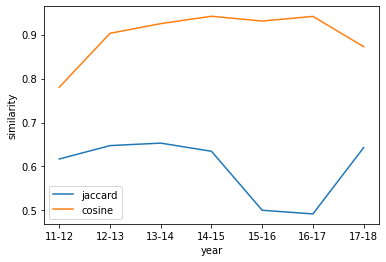

In [ ]:
#for a in jac_scores.items():

x=['11-12','12-13','13-14','14-15','15-16','16-17','17-18']
 
plt.plot(x, jac_scores,label='jaccard')
plt.plot(x, sim_scores,label='cosine')


  

plt.xlabel('year')
plt.ylabel('similarity')
plt.legend()
  

In [ ]:
#sentiment analysis
sentiments = ['negative', 'positive', 'uncertainty', 'litigious', 'constraining', 'interesting']

sentiment_df = pd.read_csv('LoughranMcDonald_MasterDictionary_2018.csv')
sentiment_df.columns = [column.lower() for column in sentiment_df.columns] # Lowercase the columns for ease of use

sentiment_df = sentiment_df[sentiments + ['word']]
sentiment_df[sentiments] = sentiment_df[sentiments].astype(bool)
sentiment_df = sentiment_df[(sentiment_df[sentiments]).any(1)]

sentiment_df['word'] = lemmatize_words(sentiment_df['word'].str.lower())
sentiment_df = sentiment_df.drop_duplicates('word')


sentiment_df.head()

negative  positive  uncertainty  ...  constraining  interesting          word
9       True     False        False  ...         False        False       abandon
12      True     False        False  ...         False        False   abandonment
13      True     False        False  ...         False        False  abandonments
51      True     False        False  ...         False        False      abdicate
54      True     False        False  ...         False        False    abdication

[5 rows x 7 columns]

In [ ]:
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer
def get_bag_of_words(sentiment_words, docs):

    vec = CountVectorizer(vocabulary=sentiment_words)
    #print(vec.vocabulary)
    vectors = vec.fit_transform(docs)
    words_list = vec.get_feature_names()
   # print(words_list[14])
    bag_of_words = np.zeros([len(docs), len(words_list)])
    
    for i in range(len(docs)):
        bag_of_words[i] = vectors[i].toarray()[0]
    return bag_of_words.astype(int)

In [ ]:
arr1={}
#for rex in finale:
arr=get_bag_of_words(sentiment_df['word'], rex)

arr1={sentiment: get_bag_of_words(sentiment_df[sentiment_df[sentiment]]['word'], rex) for sentiment in sentiments}
for key, value in arr1.items():
    print(key, ' : ', value)

negative  :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
positive  :  [[15  0  0 ...  1  0  0]
 [10  0  0 ...  0  0  0]
 [ 7  0  0 ...  0  0  0]
 ...
 [ 4  0  1 ...  0  1  0]
 [10  0  1 ...  0  0  0]
 [ 8  0  0 ...  0  0  0]]
uncertainty  :  [[0 0 0 ... 1 0 2]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]]
litigious  :  [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 2 0]
 [0 0 0 ... 0 2 0]]
constraining  :  [[ 0  0  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  3  0  2  0  1  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0
   0  6  0  0  0  0  0 15  7  0  0  1  0  2  0  4  0  0  0  1  0  0  0  0
   0  0  0  2  2 23  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  6  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  4  0  0
   0  0  0  2  0  2  0  2  0  0  0  0 13

In [ ]:
rex = [' '.join(ten_k) for ten_k in finale]
print(len(rex))
print(rex[0])

8
 letter chairman dear shareholders letter last year stated jet airways optimistic would significant improvement performance company 2010 11 management implementing several marketing operational measures achieve glad inform efforts reasonably successful company performance year review terms operational financial parameters shown marked improvement previous year despite sharp increase price aviation turbine fuel atf particularly fourth quarter financial year company successful reporting record profit tax rs 466 million pre tax loss rs 4 676 million previous year company achieved seat factor 78 6 system wide operations carried 14 7 million passengers services 22 higher 2009 10  company achieved ebitdar rs 24 8 billion 19 higher previous year according directorate general civil aviation dgca indian domestic traffic year continued show impressive growth rate 21 thereby expanding available air traffic market base country previous year growth however occurred largely lower end price range r

In [ ]:
from sklearn.metrics import jaccard_similarity_score
def get_jaccard_similarity(bag_of_words_matrix):
    
    
    jaccard_similarities = []
    bag_of_words_matrix = np.array(bag_of_words_matrix, dtype=bool  )
    print(np.array(bag_of_words_matrix[1]).shape)
    #print(bag_of_words_matrix[0])
    
    for i in range(len(bag_of_words_matrix)-1):
            u = bag_of_words_matrix[i]
            v = bag_of_words_matrix[i+1]

              
            jaccard_similarities.append(jaccard_similarity_score(u,v)) 
       
    
    return jaccard_similarities



In [ ]:
for sentiment_name,sentiment_value in arr1.items():
  print(sentiment_name)
  print(np.array(sentiment_value).shape)

negative
(8, 1515)
positive
(8, 249)
uncertainty
(8, 230)
litigious
(8, 717)
constraining
(8, 96)
interesting
(8, 60)


In [ ]:
js = {sentiment_name: get_jaccard_similarity(sentiment_values) for sentiment_name, sentiment_values in arr1.items()}
print(js)


(1515,)
(249,)
(230,)
(717,)
(96,)
(60,)
{'negative': [0.9676567656765677, 0.9702970297029703, 0.974917491749175, 0.9663366336633663, 0.9504950495049505, 0.9405940594059405, 0.9702970297029703], 'positive': [0.8594377510040161, 0.8674698795180723, 0.891566265060241, 0.8554216867469879, 0.8152610441767069, 0.7951807228915663, 0.8594377510040161], 'uncertainty': [0.9391304347826087, 0.9521739130434783, 0.9826086956521739, 0.9782608695652174, 0.9043478260869565, 0.9217391304347826, 0.8956521739130435], 'litigious': [0.9832635983263598, 0.9888423988842399, 0.9874476987447699, 0.9790794979079498, 0.9525801952580195, 0.9497907949790795, 0.9762900976290098], 'constraining': [0.90625, 0.9166666666666666, 0.9479166666666666, 0.9895833333333334, 0.9166666666666666, 0.875, 0.9375], 'interesting': [0.9833333333333333, 0.95, 0.9166666666666666, 0.9166666666666666, 0.95, 0.95, 0.9833333333333333]}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


negative
[0.9676567656765677, 0.9702970297029703, 0.974917491749175, 0.9663366336633663, 0.9504950495049505, 0.9405940594059405, 0.9702970297029703]
positive
[0.8594377510040161, 0.8674698795180723, 0.891566265060241, 0.8554216867469879, 0.8152610441767069, 0.7951807228915663, 0.8594377510040161]
uncertainty
[0.9391304347826087, 0.9521739130434783, 0.9826086956521739, 0.9782608695652174, 0.9043478260869565, 0.9217391304347826, 0.8956521739130435]
litigious
[0.9832635983263598, 0.9888423988842399, 0.9874476987447699, 0.9790794979079498, 0.9525801952580195, 0.9497907949790795, 0.9762900976290098]
constraining
[0.90625, 0.9166666666666666, 0.9479166666666666, 0.9895833333333334, 0.9166666666666666, 0.875, 0.9375]
interesting
[0.9833333333333333, 0.95, 0.9166666666666666, 0.9166666666666666, 0.95, 0.95, 0.9833333333333333]


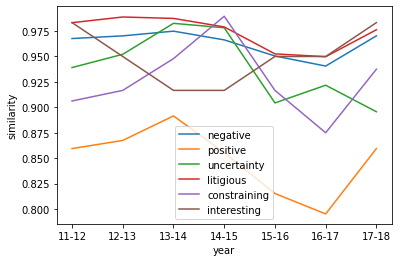

In [ ]:
import matplotlib.pyplot as plt
  

x=['11-12','12-13','13-14','14-15','15-16','16-17','17-18']
for a,b in js.items():
  print(a)
  print(b)
  plt.plot(x, b,label=a)
  

plt.xlabel('year')
plt.ylabel('similarity')
plt.legend()
  

  
# function to show the plot
plt.show()